Hypothesis using matrix</br>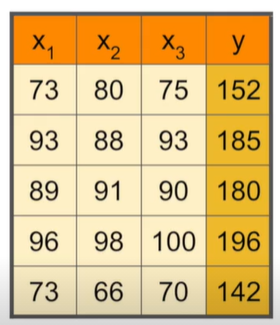

In [ ]:
import tensorflow as tf

# data and label
x1 = [73., 93., 89., 96., 73.]
x2 = [80., 88., 91., 98., 66.]
x3 = [75., 93., 90., 100., 70.]
y = [152., 185., 180., 196., 142.]


In [ ]:
# random weights

w1 = tf.Variable(tf.random.normal([1]))
w2 = tf.Variable(tf.random.normal([1]))
w3 = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))

In [ ]:
learning_rate = 0.000001

for i in range(1000 + 1):
  # tf.GradientTape() to record the gradient of the cost function
  with tf.GradientTape() as tape:
    hypothesis = w1 * x1 + w2 * x2 + w3 * x3 + b
    cost = tf.reduce_mean(tf.square(hypothesis - y))
  # calculates the gradients of the cost
  w1_grad, w2_grad, w3_grad, b_grad = tape.gradient(cost, [w1, w2, w3, b])

  # update w1, w2, w3 and b
  w1.assign_sub(learning_rate * w1_grad)
  w2.assign_sub(learning_rate * w2_grad)
  w3.assign_sub(learning_rate * w3_grad)
  b.assign_sub(learning_rate * b_grad)

  if i % 50 == 0:
    print("{:5} | {:12.4f}".format(i, cost.numpy()))

    0 | 5793889.5000
   50 |   64291.1562
  100 |     715.2903
  150 |       9.8461
  200 |       2.0152
  250 |       1.9252
  300 |       1.9210
  350 |       1.9177
  400 |       1.9145
  450 |       1.9114
  500 |       1.9081
  550 |       1.9050
  600 |       1.9018
  650 |       1.8986
  700 |       1.8955
  750 |       1.8923
  800 |       1.8892
  850 |       1.8861
  900 |       1.8829
  950 |       1.8798
 1000 |       1.8767


In [ ]:
import numpy as np

data = np.array([
                 # X1,  X2,  X3,  y
                 [73., 80., 75., 152. ],
                 [93., 88., 93., 185. ],
                 [89., 91., 90., 180. ],
                 [96., 98., 100., 196.],
                 [73., 66., 70., 142. ]                  
], dtype=np.float32)

# slice data
X = data[:, :-1]
y = data[:, [-1]]

W = tf.Variable(tf.random.normal([3, 1]))
b = tf.Variable(tf.random.normal([1]))

# hypothesis, prediction function
def predict(X):
  return tf.matmul(X, W) + b
  # tf.matmul()은 매트릭스끼리 곱해주는 함수임


In [ ]:
learning_rate = 0.000001

n_epochs = 2000 
for i in range(n_epochs + 1):
  # record the gradient of the cost function
  with tf.GradientTape() as tape:
    cost = tf.reduce_mean((tf.square(predict(X) - y)))

  # calculates the gradients of the loss
  W_grad, b_grad = tape.gradient(cost, [W, b])

  # updates parameters (W and b)
  W.assign_sub(learning_rate * W_grad)
  b.assign_sub(learning_rate * b_grad)

  if i % 100 == 0:
    print('{:5} | {:10.4f}'.format(i, cost.numpy()))

    0 | 44023.6523
  100 |    15.0905
  200 |     9.6338
  300 |     9.5951
  400 |     9.5572
  500 |     9.5196
  600 |     9.4822
  700 |     9.4449
  800 |     9.4078
  900 |     9.3709
 1000 |     9.3343
 1100 |     9.2978
 1200 |     9.2615
 1300 |     9.2254
 1400 |     9.1895
 1500 |     9.1537
 1600 |     9.1182
 1700 |     9.0828
 1800 |     9.0476
 1900 |     9.0127
 2000 |     8.9779
